## 0.2 Neural Network Classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options)

doc: https://www.learnpytorch.io/02_pytorch_classification/



## 1. Make classification data and get it ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First five samples of X:\n {X[:5]}")
print(f"First five samples of y:\n {y[:5]}")

First five samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First five samples of y:
 [1 1 1 1 0]


In [ ]:
 # Make dataframes of circle data

import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                         "X2": X[:, 1],
                         "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


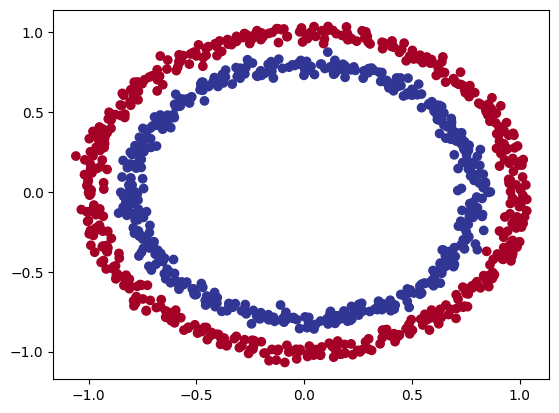

In [ ]:
# visualize
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

#### note: the data we are working with is often refered to as toy dataset, a dataset that's small enough to experiment on but still sizeable enough to practice the fundamentals

## 1.1 Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# view the first example of features and labels

X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one smaple of X: {X_sample.shape} and the same for y: {y_sample}")


Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one smaple of X: (2,) and the same for y: 1


## 1.2 Turn data into tensors and create train and test splits

In [ ]:
# turn data into tensors

import torch
torch.__version__

'2.6.0+cu124'

In [ ]:
# Turn data into tensors

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), (X.dtype, y.dtype)

(torch.Tensor, (torch.float32, torch.float32))

In [ ]:
# split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots

To do so, we want to:
1. Setup a device agnostic code so our code will work on an accelerator (GPU) if there is one
2. Construct a model (by subclassing nn.Module)
3. Define a loss function and optimizer
4. Create a training and test loop


In [ ]:
# import pytorch and nn

import torch
from torch import nn

# make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
X_train.shape

torch.Size([800, 2])

Now we've have setup our device agnostic code, let's create a model that:

1. Subclasses nn.Module (almost all models in PyTorch subclass 'nn.Module')
2. Create 2 'nn.Linear()' layers that are capable of handling the shapes of our data
3. Defines a 'forward()' method that outlines the forward pass (or forward computation) of the model
4. Instantiate an instance of our model class and send it to the target' device'

In [ ]:
# 1. Construct a model that subclassses nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. create 2 nn.Linear layers capable of handling the shapes our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  # 3. create a forward pass

  def forward(self, x):      # method that outlines the forward pass
    return self.layer_2((self.layer_1(x)))  # x -> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of our model and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.5988,  0.4893],
                      [-0.1946, -0.2711],
                      [-0.5869, -0.7030],
                      [ 0.2023, -0.1545],
                      [ 0.2753, -0.5803]])),
             ('layer_1.bias',
              tensor([ 0.5250, -0.5191, -0.1221,  0.1477,  0.3650])),
             ('layer_2.weight',
              tensor([[ 0.3610,  0.4074, -0.3546,  0.1125, -0.1924]])),
             ('layer_2.bias', tensor([-0.0490]))])

In [ ]:
# make some predictions with our model

with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Lenght of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Lenght of test samples: {len(X_test)}, shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n {y_test[:10]} ")

Lenght of predictions: 200, Shape: torch.Size([200, 1])
Lenght of test samples: 200, shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[0.],
        [0.],
        [-0.],
        [0.],
        [-0.],
        [-0.],
        [0.],
        [-0.],
        [-0.],
        [0.]])

First 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]) 


In [ ]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

## 2.1 Setup loss function and optmizer

Which loss function or optimizer should you use?
Again...this is problem specific

For example,
for regression you might want MAE(mean absolute error/ mean square error)
For classification you might want binary cross entropy or categorical cross entropy (cross entropy)

As a reminder: the loss function measures how wrong our model's predictions are

and for optimizers, two of the most are common and useful are: ADAM and SGD

however, pytorch has many built-in options

* For some common choices of loss functions and optimizers: https://www.learnpytorch.io/02_pytorch_classification/#21-setup-loss-function-and-optimizer

* for the loss function we're going to use torch.nn.BCEWithLogitsLoss(), for more info, check out: https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a/

* for a definition on what a logit is: https://stackoverflow.com/questions/41455101/what-is-the-meaning-of-the-word-logits-in-tensorflow

* for different optimizers: see. torch.optim

In [ ]:
# Setup the loss function

# loss_fn = nn.BCELoss() # requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() #BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)



In [ ]:
# calculate accuracy - out of a 100 examples, what percentage does our model gets right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/ len(y_pred) * 100)
  return acc

## Train model

to train our model, we're going to need to build a training loop

1. forward pass
2. calculate the loss
3. optimizer zero grad
4. loss backward (back propogation)
5. optimizer step (gradient descent)

### 3.1 Going from raw logits --> prediction probabilities --> prediction labels
Our model outputs are going to be raw **logits**
(the raw outputs of our model is called logits in ML/DL

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g., sigmoid for binary classication  and softmax for multiclass classification)

Then we can convert our model's prediciton probabilities to **prediction labels** by either rounding them or taking the argmax()



In [ ]:
# view the first outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():

  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.2426],
        [ 0.3104],
        [-0.1276],
        [ 0.3483],
        [-0.4333]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# use the sigmoid activation function on our model logits to turn them into prediction proababalities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5604],
        [0.5770],
        [0.4681],
        [0.5862],
        [0.3933]])

For our prediction probability values, we need to perform a range-style rounding on them:
* y_pred_probs >= 0.5, y=1 (class 1)
* y_pred_probs < 0.5, y=0 (class 0)


In [ ]:
# find the predicted labels
y_preds = torch.round(y_pred_probs)


# in full (logits -> pred_probs -> pred_labels)
y_preds_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for eqaulity
print(torch.eq(y_preds.squeeze(), y_preds_labels.squeeze()))

#get rid of extra dimenion

y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 0., 1., 0.])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 100

# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


# build training and evaluation loop

for epoch in range(epochs):
  ## training
  model_0.train()
  # 1. forward pass
  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits)) # turn logits into pred_probs into pred_labels

  # 2. calculate the loss/accuracy

  # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabalities as input
  #                y_train)

  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_preds)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward (backpropogation)
  loss.backward()

  # 5. optimizer step (gradient descent)
  optimizer.step()

  # testing
  model_0.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))


    # 2. calculate the loss
    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:5f}, Acc: {acc:.2f}% | Test loss: {test_loss:5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.701542, Acc: 49.88% | Test loss: 0.709425, Test acc: 48.00%
Epoch: 10 | Loss: 0.699000, Acc: 49.88% | Test loss: 0.706284, Test acc: 48.50%
Epoch: 20 | Loss: 0.697333, Acc: 50.25% | Test loss: 0.703980, Test acc: 47.00%
Epoch: 30 | Loss: 0.696180, Acc: 50.12% | Test loss: 0.702219, Test acc: 48.00%
Epoch: 40 | Loss: 0.695354, Acc: 50.62% | Test loss: 0.700842, Test acc: 47.50%
Epoch: 50 | Loss: 0.694753, Acc: 50.25% | Test loss: 0.699749, Test acc: 47.00%
Epoch: 60 | Loss: 0.694310, Acc: 50.12% | Test loss: 0.698873, Test acc: 47.00%
Epoch: 70 | Loss: 0.693981, Acc: 50.62% | Test loss: 0.698166, Test acc: 47.50%
Epoch: 80 | Loss: 0.693735, Acc: 50.62% | Test loss: 0.697590, Test acc: 47.00%
Epoch: 90 | Loss: 0.693550, Acc: 50.62% | Test loss: 0.697119, Test acc: 47.00%


In [ ]:
loss_fn

BCEWithLogitsLoss()

In [ ]:
loss_fn_without_logits = nn.BCELoss()
loss_fn_without_logits

BCELoss()

In [ ]:
circles.label.value_counts()

,count
label,
1,500
0,500


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything
So to inpsect it, let's make some predictions and make them visual

To do so, we're going to import a function called plot_decision_boundary()


In [ ]:
import requests
from pathlib import Path

# download helper functions from Learn Pytorch repo (if not already downloaded)

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping downloading")
else:
  print("downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping downloading


Cmd + shift + space: allows you to check what input a function takes!

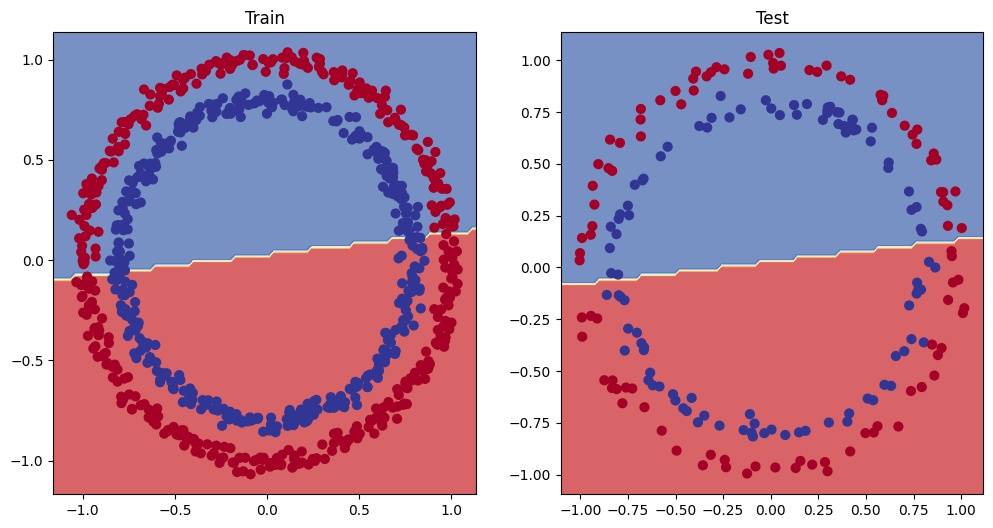

In [ ]:
# plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate (be careful of exploding gradient problem/vanishing gradient problem)
* Change the loss function

These options are all from the model's perspective because they deal directly with the model, rather than the data

And because these options are values we (as ML engineer) can change, they are refered too as *hyperparameters*

Let's try and improve our model by:
* adding more hidden units: 5 -> 10
* Increase the number of layers 2 -> 3
* Increase the number of epochs 100 -> 1000

(keep in mind that, when experimenting with improving the model, make sure to change one aspect and see the change, and then move on the changing other aspects of the model)


In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

    # creating a forward function
  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict(), model_1.state_dict()

(OrderedDict([('layer_1.weight',
               tensor([[-0.5729,  0.4292],
                       [-0.1604, -0.3500],
                       [-0.6134, -0.6416],
                       [ 0.2142, -0.1818],
                       [ 0.2659, -0.5583]])),
              ('layer_1.bias',
               tensor([ 0.5446, -0.4943, -0.1419,  0.1559,  0.3571])),
              ('layer_2.weight',
               tensor([[ 0.2566,  0.4215, -0.2833,  0.1712, -0.0388]])),
              ('layer_2.bias', tensor([0.0117]))]),
 OrderedDict([('layer_1.weight',
               tensor([[ 0.5406,  0.5869],
                       [-0.1657,  0.6496],
                       [-0.1549,  0.1427],
                       [-0.3443,  0.4153],
                       [ 0.6233, -0.5188],
                       [ 0.6146,  0.1323],
                       [ 0.5224,  0.0958],
                       [ 0.3410, -0.0998],
                       [ 0.5451,  0.1045],
                       [-0.3301,  0.1802]])),
              ('layer_1

In [ ]:
# create a loss function

loss_fn = nn.BCEWithLogitsLoss()

# create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)



In [ ]:
# writing a training and testing loop for model_1

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# train for longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ## training
    model_1.train()
    # 1. forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> prediction labels

    # 2. calculate the loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

  ## testing
    model_1.eval()
    with torch.inference_mode():
        # 1. forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. calculate the loss
        test_loss = loss_fn(test_logits,
                            y_test)

        test_acc = accuracy_fn(y_true=y_test,
                              y_pred=test_pred)

      # print out what's happening
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Acc: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Acc: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Acc: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%


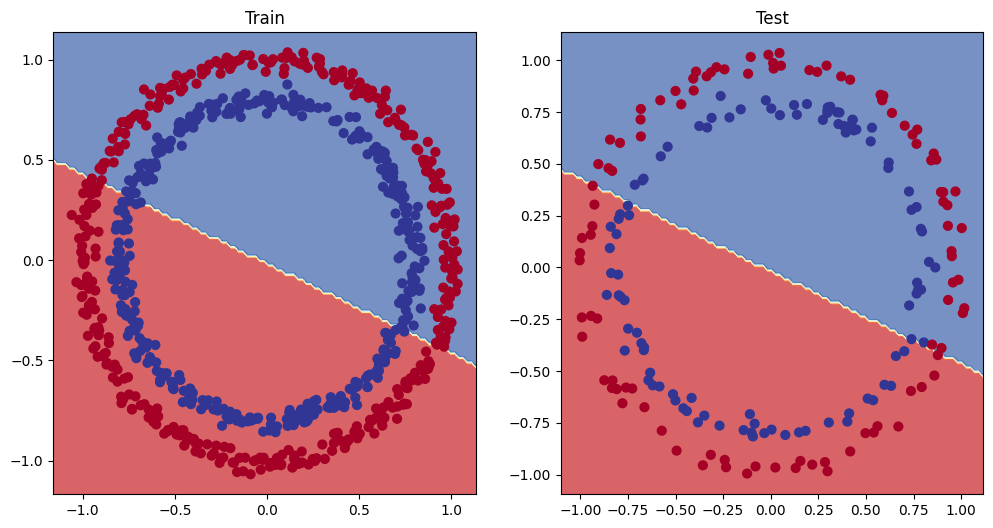

In [ ]:
# plot the decision boundary

# plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem


In [ ]:
# create some data (same as notebook as 01)
weight= 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula (without epsilon)

# check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
 # Create train and test splits

 train_split = int(0.8 * len(X_regression))
 X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
 X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

 # check the lenghts of each
 len(X_train_regression), len(y_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

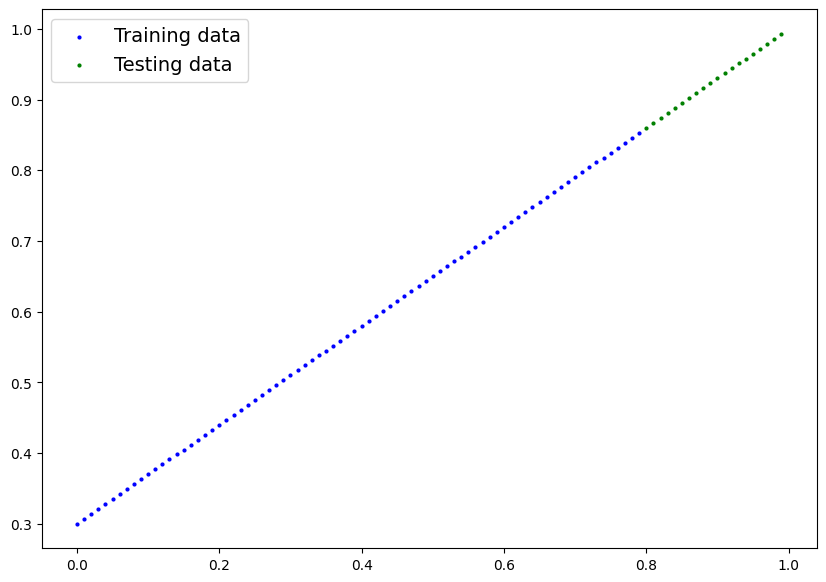

In [ ]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

## 5.2 Adjusting 'model_1' to fit a straight line

In [ ]:
X_train_regression[:10]

tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])

In [ ]:
# same architecture as model 1(but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)


In [ ]:
# train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 1000

# put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | test loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.75986 | test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | test loss: 0.00360


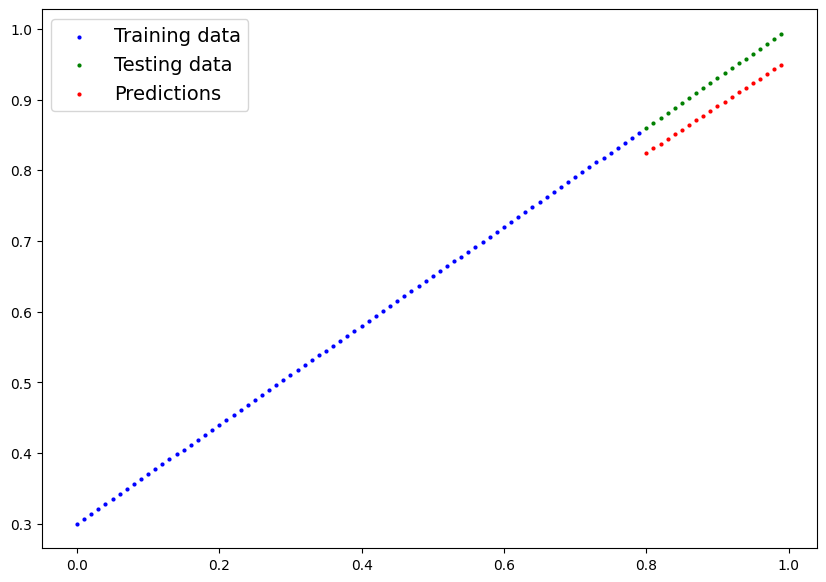

In [ ]:
# turn on evaluation mode

model_2.eval()

# make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());


## 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of a staight and non-straight lines?"

or in machine learning terms, an infinite (but really it is finite) linear and non-linear functions

## 6.1 Recreating non-linear data (red and blue circles)


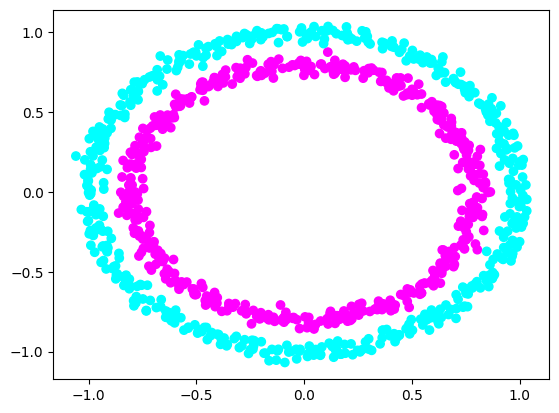

In [ ]:
# make and plot data

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.cool);

In [ ]:
# convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# turning data to tensors


# splting data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train[:5], X_test[:5], y_train[:5], y_test[:5]

(array([[ 0.65794626, -0.46508097],
        [ 0.63194897, -0.7346633 ],
        [-1.00861631, -0.12403051],
        [-0.96657519, -0.22562157],
        [-0.16659009,  0.79944645]]),
 array([[-0.37519302,  0.68265972],
        [ 0.01538035,  0.96002602],
        [-0.7027836 , -0.31471699],
        [-0.28525015,  0.96637754],
        [ 0.40241682, -0.74375355]]),
 array([1, 0, 0, 0, 1]),
 array([1, 0, 1, 0, 1]))

In [ ]:

print(f"X_train type: {type(X_train)}, shape: {getattr(X_train, 'shape', 'no shape')}")
print(f"X_test type: {type(X_test)}, shape: {getattr(X_test, 'shape', 'no shape')}")
print(f"y_train type: {type(y_train)}, shape: {getattr(y_train, 'shape', 'no shape')}")
print(f"y_test type: {type(y_test)}, shape: {getattr(y_test, 'shape', 'no shape')}")


X_train type: <class 'numpy.ndarray'>, shape: (800, 2)
X_test type: <class 'numpy.ndarray'>, shape: (200, 2)
y_train type: <class 'numpy.ndarray'>, shape: (800,)
y_test type: <class 'numpy.ndarray'>, shape: (200,)


In [ ]:
import numpy as np

if isinstance(X_train, np.ndarray):
  X_train = torch.from_numpy(X_train).float().to(device)
  X_test = torch.from_numpy(X_test).float().to(device)
  y_train = torch.from_numpy(y_train).float().to(device)
  y_test = torch.from_numpy(y_test).float().to(device)
else:
  X_train = X_train.float().to(device)
  X_test = X_test.float().to(device)
  y_train = y_train.float().to(device)
  y_test = y_test.float().to(device)

## 6.2 Building a model with non-linearity

* Linear = straight line
* Non-linear = non-straight line

Artificial neural networks are a large combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data

In [ ]:
# let's build a model with non-linear activation
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear actvation function

  def forward(self, x):
    # where should we put our non-linear activation functions?
    return self.layer_3(self.layer_2(self.relu(self.layer_1(x))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# setup loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)


## 6.3 Training a model with non-linearity

In [ ]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):
  # training
  model_3.train()

  # 1. forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

  # 2. calculate the loss
  loss = loss_fn(y_logits, y_train) #BCEWithLogitsLoss (takes in logits as first input)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. step the optimizer
  optimizer.step()

  ## testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

# print out what's happening
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}%, Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6944, Acc: 50.00%, Test loss: 0.6941, Test acc: 50.00%
Epoch: 100 | Loss: 0.6898, Acc: 52.38%, Test loss: 0.6894, Test acc: 51.00%
Epoch: 200 | Loss: 0.6871, Acc: 58.25%, Test loss: 0.6860, Test acc: 59.00%
Epoch: 300 | Loss: 0.6834, Acc: 53.87%, Test loss: 0.6818, Test acc: 58.00%
Epoch: 400 | Loss: 0.6783, Acc: 53.87%, Test loss: 0.6759, Test acc: 57.00%
Epoch: 500 | Loss: 0.6706, Acc: 53.25%, Test loss: 0.6675, Test acc: 58.00%
Epoch: 600 | Loss: 0.6583, Acc: 59.13%, Test loss: 0.6547, Test acc: 59.00%
Epoch: 700 | Loss: 0.6352, Acc: 71.75%, Test loss: 0.6326, Test acc: 75.00%
Epoch: 800 | Loss: 0.5903, Acc: 85.88%, Test loss: 0.5933, Test acc: 87.00%
Epoch: 900 | Loss: 0.5105, Acc: 94.12%, Test loss: 0.5261, Test acc: 90.50%


In [ ]:
len(X_test), len(y_test)

(200, 200)

## 6.4 Evaluating a model trained with non-linear activation functions

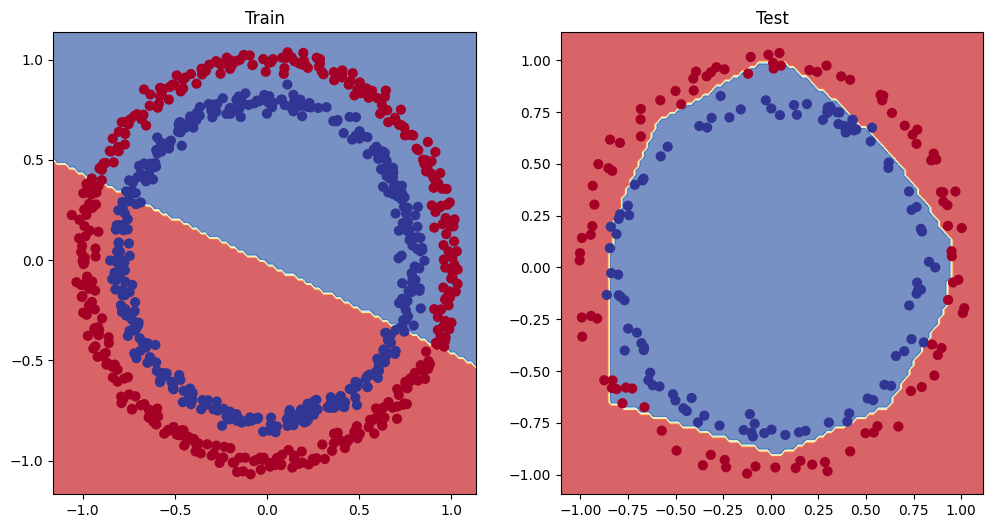

In [ ]:
# plot the decision boundary

# plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

In [ ]:
# make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 1., 1., 0., 1., 1., 0., 0., 1., 1.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

## 7. Replicating non-linear activation functions
Neural networks, rather than us telling the model what to learn, we give it tools to discover patterns in data and it tries to figure out the best pattersn on its own

And these tools are: linear and non-linear functions

In [ ]:
# create a tensor

A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype


torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

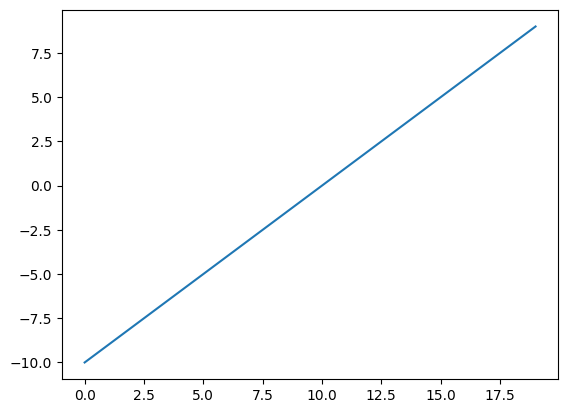

In [ ]:
# visualize the data
plt.plot(A)

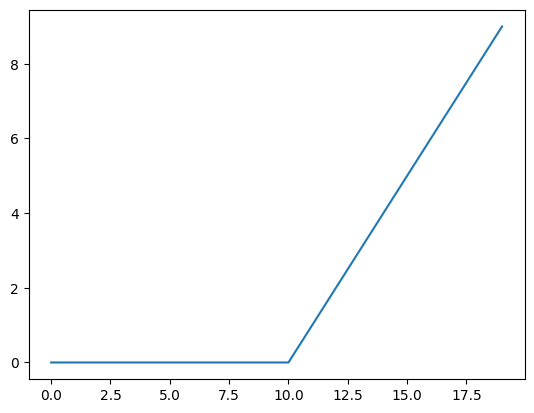

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x) # input must be tensors
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

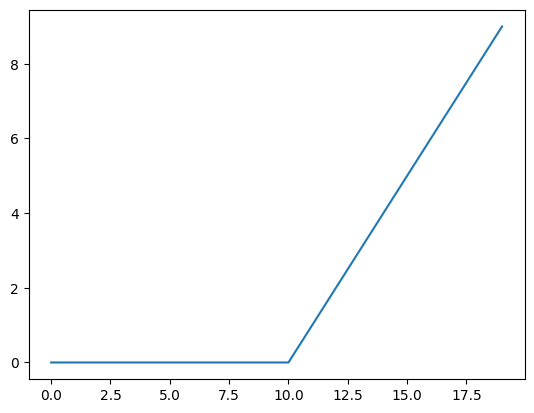

In [ ]:
# plot ReLU activation function
plt.plot(relu(A));

In [ ]:
 # let's do the same with sigmoid

def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

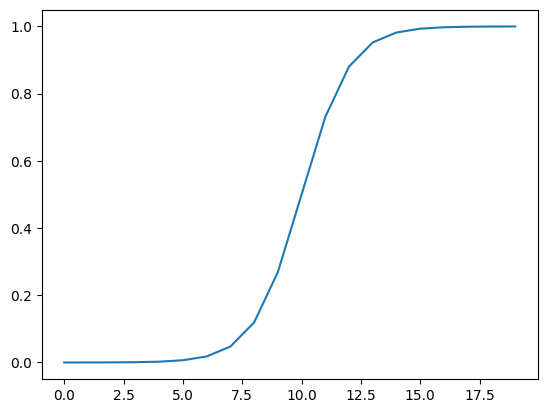

In [ ]:
plt.plot(torch.sigmoid(A))

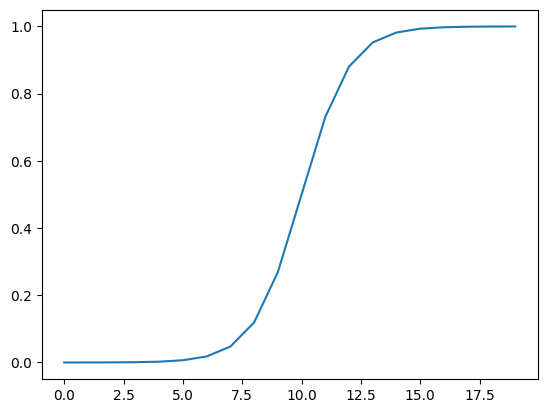

In [ ]:
plt.plot(sigmoid(A))

## 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another (cat vs. dog / spam or not spam)

* Multi-class classification = more than one thing or another (cat vs dog vs chicken) / could 5 or 10 or 5000 things

## 8.1 Creating a toy multi class dataset


doc: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

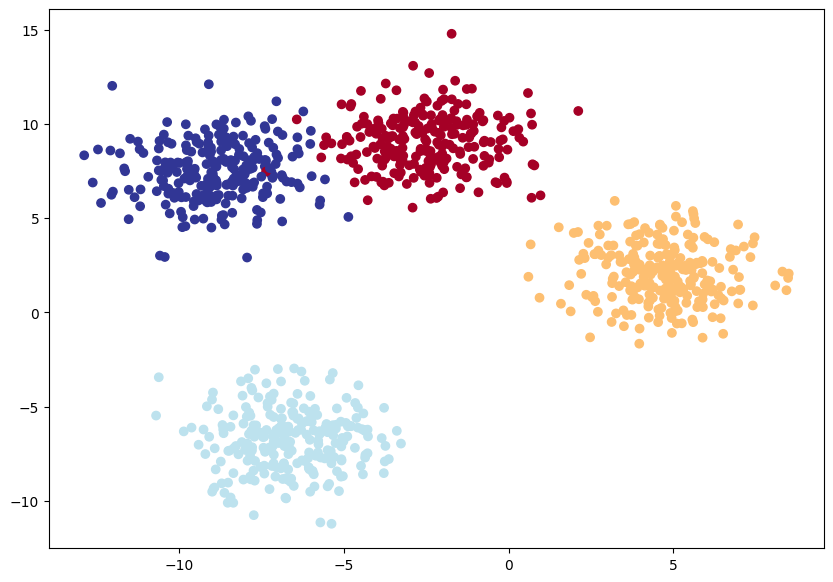

In [ ]:

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


# set the hyperparamters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#   1. create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED
                            )

# turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into training and test

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED
                                                                        )
# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);


## 8.2 Building a multi-class model in pytorch

In [ ]:
# create device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# building a multi-class classification model

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initilizes multi-class classification model

    Args:
    input_features (int): number of input features to the model
    out_features (int): number of output features to the model (number of output classes)
    hidden_units (int): number of hidden units between layers, default is 8

    Returns:
    Example:

    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)
# creating an instance and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4



BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

## 8.3 Create a loss function and an optimizer for our multi-class classification model


In [ ]:
# create a loss function for multi-class classification

loss_fn = nn.CrossEntropyLoss

# create an optimizer
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1) # lr is a hyperparameter you can change


## 8.4 Getting prediction probabilities for a multi-class Pytorch model

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels

Logits(raw output of the model) -> Pred probs(use torch.softmax) -> pred labels (take the argmax of the prediction probabalities)

In [ ]:
# let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]


tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
X_blob_test.device

device(type='cpu')

In [ ]:
# convert our model's logit outputs to prediction probabilities

y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [ ]:
y_pred_probs[:5]

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])

In [ ]:
torch.sum(y_pred_probs[0])

tensor(1.0000)

In [ ]:
torch.max(y_pred_probs[0])

tensor(0.3244)

In [ ]:
# convert our model's prediction probabalities to prediction labels

y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [ ]:
loss_fn = nn.CrossEntropyLoss()

## 8.5 Creating a training loop and testing loop for a multi-class PyTorch model

In [ ]:
 # fit the multi class model to the data

torch.manual_seed(42)
torch.cuda.manual_seed(42)


# set number of epochs
epochs = 100

# put data to the target device

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# loop through data

for epoch in range(epochs):
  ## training
  model_4.train()
  y_logits = model_4(X_blob_train)

  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ## testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)


    # print out what's happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.1588, Acc: 40.38% | Test loss: 1.0755, Test acc: 48.00%
Epoch: 10 | Loss: 0.6448, Acc: 96.75% | Test loss: 0.6607, Test acc: 97.50%
Epoch: 20 | Loss: 0.4254, Acc: 98.50% | Test loss: 0.4307, Test acc: 100.00%
Epoch: 30 | Loss: 0.2529, Acc: 99.12% | Test loss: 0.2451, Test acc: 99.50%
Epoch: 40 | Loss: 0.1123, Acc: 99.25% | Test loss: 0.1023, Test acc: 99.50%
Epoch: 50 | Loss: 0.0663, Acc: 99.25% | Test loss: 0.0585, Test acc: 99.50%
Epoch: 60 | Loss: 0.0507, Acc: 99.25% | Test loss: 0.0429, Test acc: 99.50%
Epoch: 70 | Loss: 0.0430, Acc: 99.25% | Test loss: 0.0349, Test acc: 99.50%
Epoch: 80 | Loss: 0.0384, Acc: 99.25% | Test loss: 0.0299, Test acc: 99.50%
Epoch: 90 | Loss: 0.0352, Acc: 99.25% | Test loss: 0.0266, Test acc: 99.50%


## 8.6 Making and evaluating predictions with a Pytorch multi class model

In [ ]:

## make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 predicitons
y_logits[:10]


tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [ ]:
# go from logits to prediction probabilities

y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]


tensor([[1.3437e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [ ]:
# go from pred_probs to pred_labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

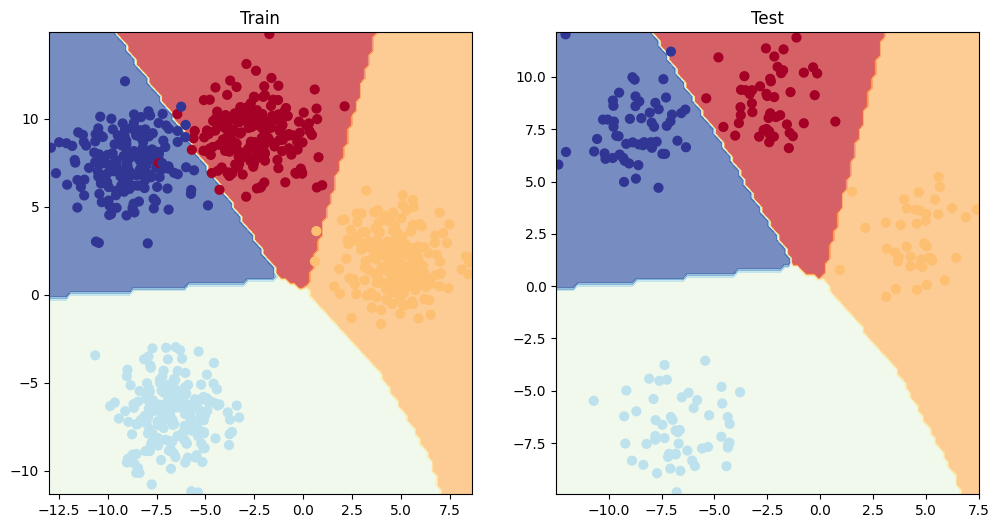

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)


## 9. A few more classification metrics (to evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right
* Precision
* Recall
* F1-score (which combines precsion and recall)
* Confusion matrix
* Classification report


See this article for when to use precisio recall: https://medium.com/data-science/beyond-accuracy-precision-and-recall-3da06bea9f6c


If you want to access to a lot of PyTorch metrics, see TorchMetrics: https://torchmetrics.readthedocs.io/en/v0.9.1/classification/accuracy.html

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 823.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 31.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
from torchmetrics import Accuracy

from torchmetrics.classification import Accuracy

torchmetric_accuracy = Accuracy(task="multiclass", num_classes=3).to(device)